import dependency

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


For possible cleaning

In [2]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

if needed downlaod the nltk

In [3]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package stopwords to C:\Users\Sudais
[nltk_data]     Khan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Sudais
[nltk_data]     Khan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Sudais
[nltk_data]     Khan\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

load the dataset

In [17]:
df = pd.read_csv("spam.csv", encoding="latin1")

In [18]:
df = df[['v1', 'v2']]

In [19]:
df.columns = ['label', 'text']

In [20]:
df = df.dropna(subset=['text', 'label'])

In [22]:
print(df.head())

  label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


Rename for consistency

In [23]:
df = df.rename(columns={ "label": "label", "text": "text", "email": "text" })

In [24]:
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


Drop missing

In [25]:
df = df.dropna(subset=['text', 'label'])

In [26]:
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


Clean / Preprocess Text

In [27]:
lemm = WordNetLemmatizer()
stop = set(stopwords.words('english'))

In [28]:
lemm

<WordNetLemmatizer>

In [29]:
stop

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [30]:
def clean_text(txt):
    txt = txt.lower()
    # remove non-letters
    txt = re.sub(r'[^a-zA-Z]', ' ', txt)
    tokens = txt.split()
    tokens = [lemm.lemmatize(w) for w in tokens if w not in stop and len(w) > 1]
    return " ".join(tokens)

In [37]:
C_t = df['clean_text'] = df['text'].apply(clean_text)

In [38]:
C_t

0       go jurong point crazy available bugis great wo...
1                                   ok lar joking wif oni
2       free entry wkly comp win fa cup final tkts st ...
3                           dun say early hor already say
4                     nah think go usf life around though
                              ...                        
5567    nd time tried contact pound prize claim easy c...
5568                              going esplanade fr home
5569                                 pity mood suggestion
5570    guy bitching acted like interested buying some...
5571                                       rofl true name
Name: text, Length: 5572, dtype: object

encodes labels

In [39]:
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])
# e.g. “spam”→1, “ham” (not spam)→0 (or vice versa)
print("Classes:", le.classes_)

Classes: ['ham' 'spam']


Split Train / Test

In [40]:
X = df['clean_text']
y = df['label_encoded']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

vectorize with Tf-IDF

In [42]:
tfidf = TfidfVectorizer(ngram_range=(1,2),  # unigrams + bigrams
                        max_df=0.9,        # ignore very common terms
                        min_df=5,          # ignore very rare
                        stop_words='english')

In [43]:

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [44]:
print("TF-IDF shape:", X_train_tfidf.shape, X_test_tfidf.shape)

TF-IDF shape: (4457, 1597) (1115, 1597)


train navie bayes

In [45]:
nb = MultinomialNB(alpha=1.0)  # smoothing parameter
nb.fit(X_train_tfidf, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


Predict & Evaluate

In [46]:
y_pred = nb.predict(X_test_tfidf)

In [47]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Accuracy: 0.9739910313901345
Classification Report:
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       966
        spam       0.98      0.83      0.89       149

    accuracy                           0.97      1115
   macro avg       0.97      0.91      0.94      1115
weighted avg       0.97      0.97      0.97      1115



confusion matrix

In [48]:

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[963   3]
 [ 26 123]]


tune alpha, adjust ngram_range, try feature selection, etc.
# E.g. using GridSearchCV:

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
params = {
    'alpha': [0.5, 1.0, 1.5],
    # you could also vary TF-IDF params, but for simplicity, keep TFIDF fixed
}

In [51]:
gs = GridSearchCV(MultinomialNB(), params, cv=5, scoring='accuracy', verbose=1)
gs.fit(X_train_tfidf, y_train)
print("Best params:", gs.best_params_)
print("Best CV score:", gs.best_score_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best params: {'alpha': 0.5}
Best CV score: 0.9804804396732647


 Evaluate best estimator on test set

In [52]:
best_nb = gs.best_estimator_
y_pred2 = best_nb.predict(X_test_tfidf)
print("Test Accuracy (best):", accuracy_score(y_test, y_pred2))
print(classification_report(y_test, y_pred2, target_names=le.classes_))

Test Accuracy (best): 0.9757847533632287
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       966
        spam       0.98      0.84      0.90       149

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.94      1115
weighted avg       0.98      0.98      0.97      1115



take input or email message from user


📨 You can either TYPE or PASTE an email below to check if it's spam or not.




🧾 Model Prediction: SPAM


C:\Users\Sudais Khan\AppData\Local\Temp\ipykernel_5880\2283854681.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["ham", "spam"], y=[prediction == 0, prediction == 1], palette="coolwarm")
i:\machine learning\house price prediction using linear regression\ML model 3\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128231 (\N{E-MAIL SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


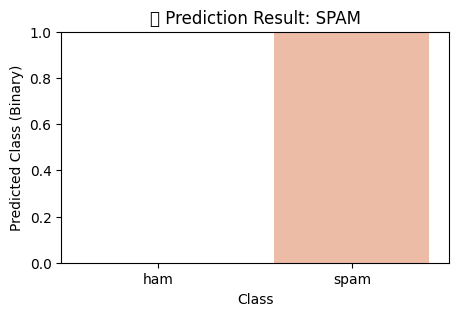

C:\Users\Sudais Khan\AppData\Local\Temp\ipykernel_5880\2283854681.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=le.classes_, y=probs, palette="viridis")
i:\machine learning\house price prediction using linear regression\ML model 3\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


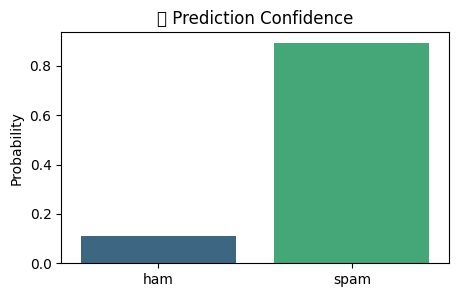

📊 Confidence -> HAM: 0.109, SPAM: 0.891


In [54]:
# === 9. User Input for Spam Check (VS Code / Local Version) ===
import matplotlib.pyplot as plt
import seaborn as sns

print("\n📨 You can either TYPE or PASTE an email below to check if it's spam or not.\n")

# Manual input 
user_email = input("✉️ Type or paste your email text here (press Enter when done): ").strip()

if not user_email:
    print("⚠️ No input detected. Please type an email next time.")
else:
    # === 10. Preprocess + Predict ===
    cleaned_input = clean_text(user_email)
    input_tfidf = tfidf.transform([cleaned_input])
    prediction = best_nb.predict(input_tfidf)[0]  # use the best model after tuning
    pred_label = le.inverse_transform([prediction])[0]

    # === 11. Display Result ===
    print("\n🧾 Model Prediction:", pred_label.upper())

    # === 12. Visualization ===
    plt.figure(figsize=(5,3))
    sns.barplot(x=["ham", "spam"], y=[prediction == 0, prediction == 1], palette="coolwarm")
    plt.title(f"📧 Prediction Result: {pred_label.upper()}")
    plt.ylabel("Predicted Class (Binary)")
    plt.xlabel("Class")
    plt.ylim(0, 1)
    plt.show()

    # === 13. Confidence Scores (optional) ===
    probs = best_nb.predict_proba(input_tfidf)[0]
    plt.figure(figsize=(5,3))
    sns.barplot(x=le.classes_, y=probs, palette="viridis")
    plt.title("🔍 Prediction Confidence")
    plt.ylabel("Probability")
    plt.show()

    print(f"📊 Confidence -> HAM: {probs[0]:.3f}, SPAM: {probs[1]:.3f}")
